In [1]:
import numpy as np
import matplotlib.pyplot as plt

- numpy, matplotlib을 활용하여 영상데이터의 처리 및 시각화를 진행해보자.
- https://numpy.org/numpy-tutorials/
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html

## Matrix의 서로 다른 숫자를 서로 다른 색으로 표현해보기

In [2]:
A = np.array([[0,0,0],[1,0,1],[1,1,1]])
print(A)

[[0 0 0]
 [1 0 1]
 [1 1 1]]


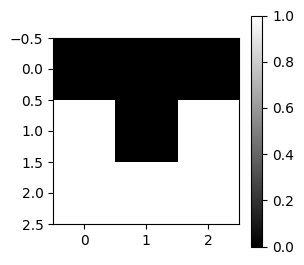

In [3]:
plt.figure(figsize=(3,3))
plt.imshow(A,cmap='gray',vmin=0,vmax=1)
plt.colorbar()
plt.show()

In [4]:
N = 4
a = np.reshape(np.arange(0,N),(1,N))
b = np.ones((N,1))
print(a.shape,b.shape)

(1, 4) (4, 1)


In [5]:
print(a*b), print((a*b).transpose())

[[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]


(None, None)

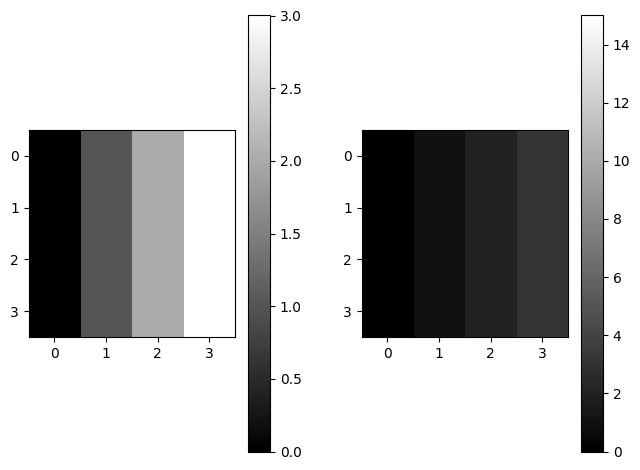

In [6]:
plt.figure(dpi=100)

plt.subplot(121)
plt.imshow(a*b,cmap='gray',vmin=0,vmax=N-1)
plt.colorbar()

plt.subplot(122)
plt.imshow(a*b,cmap='gray',vmin=0,vmax=15)
plt.tight_layout()
plt.colorbar()

plt.show()

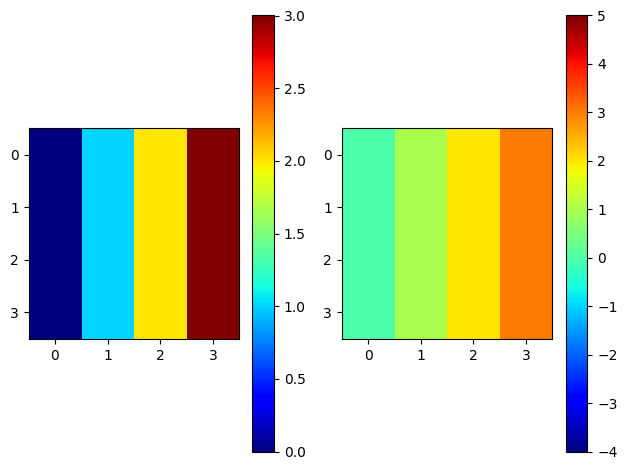

In [7]:
plt.figure(dpi=100)

plt.subplot(121)
plt.imshow(a*b,cmap='jet',vmin=0,vmax=N-1)
plt.colorbar()

plt.subplot(122)
plt.imshow(a*b,cmap='jet',vmin=-4,vmax=5)
plt.colorbar()

plt.tight_layout()

plt.show()

## Google Drive에서 image 가져오기
- 본인의 PC에서 작업하는 경우 생략 가능

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os

In [13]:
imgpath = '/content/drive/MyDrive/class/DIP1/DIP4E'
#os.listdir(imgpath)

In [14]:
myimg0 = plt.imread(os.path.join(imgpath,'angiography-mask-image.tif'))
print(myimg0.shape)
print(myimg0.dtype)

myimg1 = plt.imread(os.path.join(imgpath,'angiography-live-image.tif'))
print(myimg1.shape)
print(myimg1.dtype)

(690, 690)
uint8
(690, 690)
uint8


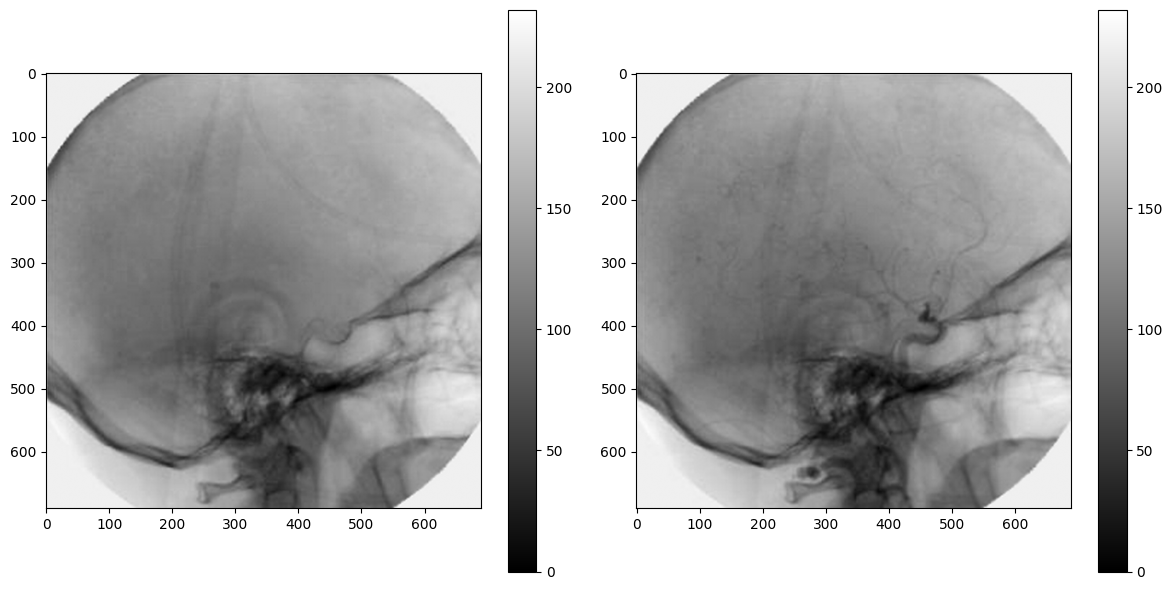

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(myimg0,cmap='gray')
plt.colorbar()
plt.subplot(122)
plt.imshow(myimg1,cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.show()

## 두 영상에 대한 빼기(subtraction) 이미지 생성




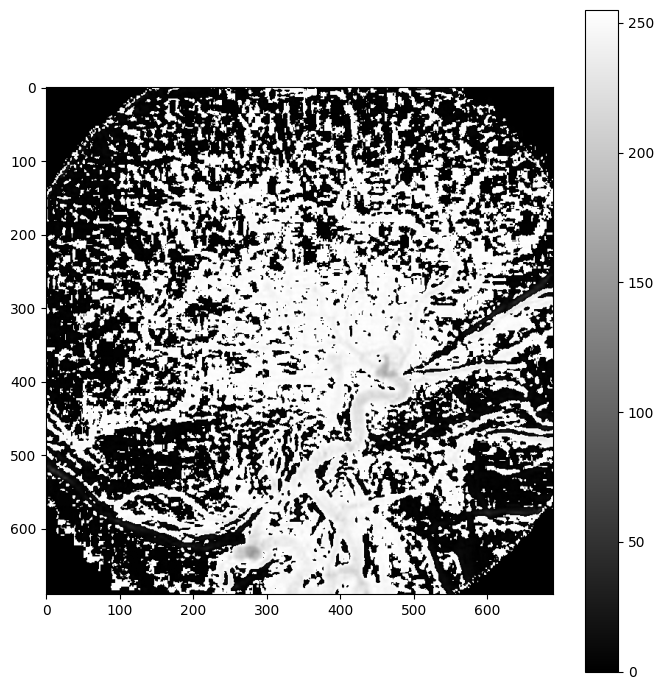

In [17]:
plt.figure(figsize=(7,7))
plt.imshow(myimg1-myimg0,cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.show()

## Exercise 1
- 예제의 사칙연산의 결과는 잘못된 부분들이 있다. 잘못된 부분이 무엇인지 이해하고, 이를 해결하여 시각화를 진행해보자.

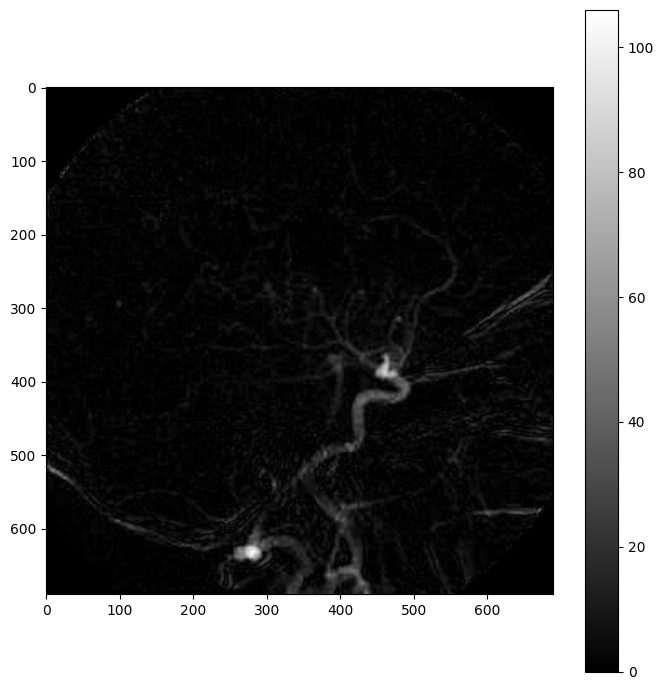

In [37]:
sub_img = np.abs(myimg1.astype(float) - myimg0.astype(float))

plt.figure(figsize=(7,7))
plt.imshow(sub_img, cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.show()

## Downsampling & Interpolation

(2136, 2140)
uint8


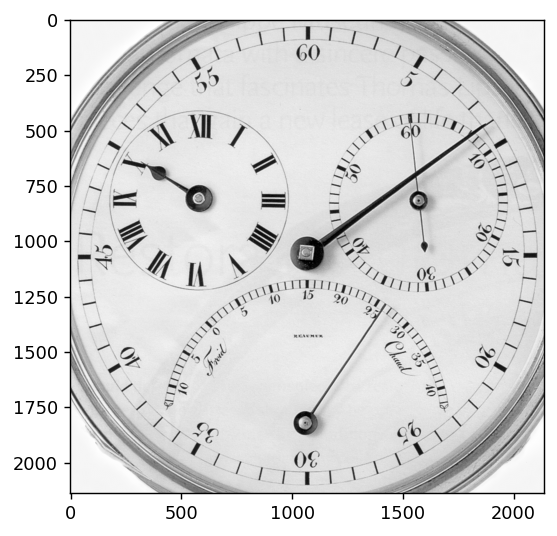

In [18]:
myimg = plt.imread(os.path.join(imgpath,'Chronometer.tif'))
print(myimg.shape)
print(myimg.dtype)
plt.figure(dpi=128)
plt.imshow(myimg,cmap='gray')
plt.show()


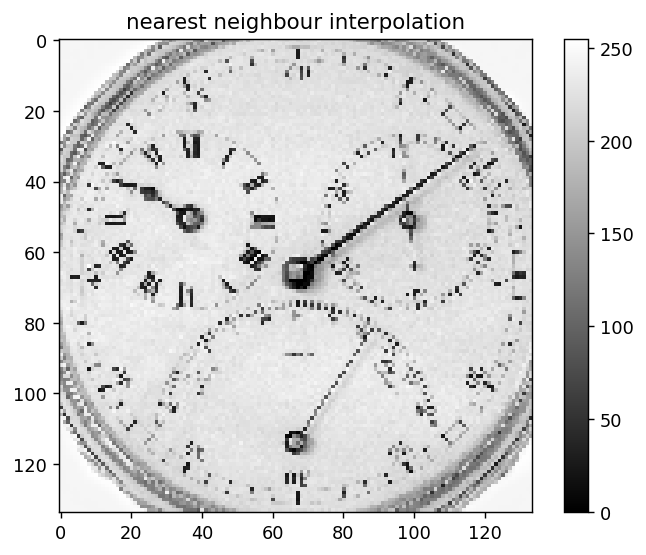

In [19]:
Ns = 16
myimg_s = myimg[::Ns,::Ns]
plt.figure(dpi=128)
plt.imshow(myimg_s,cmap='gray',interpolation='nearest')
plt.colorbar()
plt.title('nearest neighbour interpolation')
plt.show()

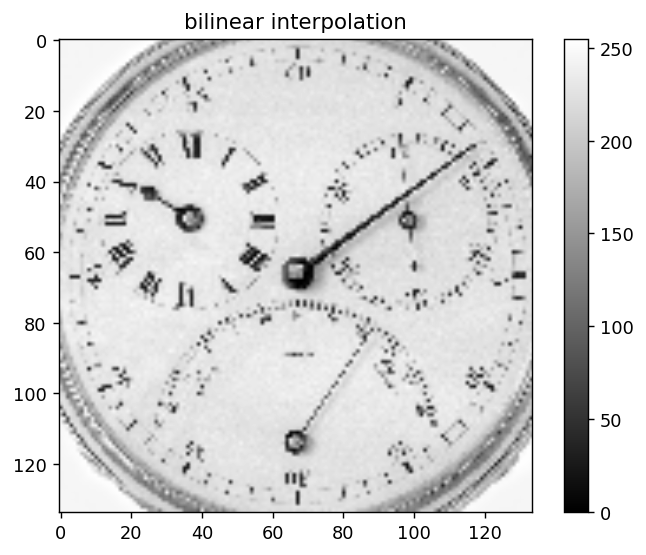

In [20]:
plt.figure(dpi=128)
plt.imshow(myimg_s,cmap='gray',interpolation='bilinear')
plt.colorbar()
plt.title('bilinear interpolation')
plt.show()

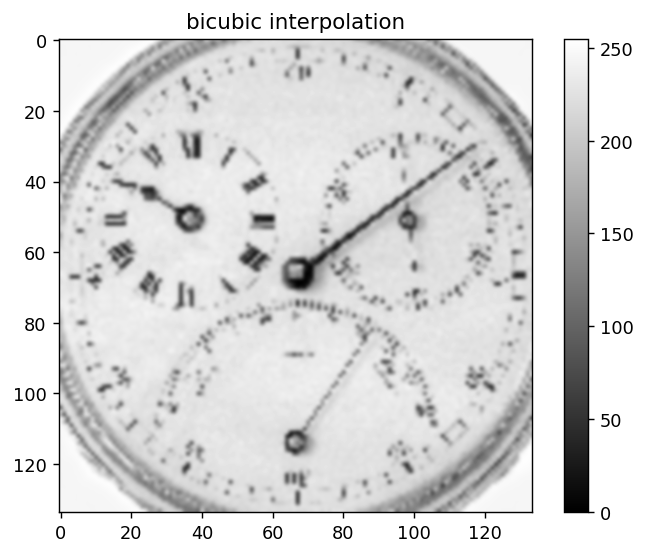

In [21]:
plt.figure(dpi=128)
plt.imshow(myimg_s,cmap='gray',interpolation='bicubic')
plt.colorbar()
plt.title('bicubic interpolation')
plt.show()

## Exercise 2
- 본인의 사진을 256 x 256 크기로 crop한 후, 32 x 32 크기로 downsampling하여 낮은 해상도의 image로 만들고, 세 가지 다른 interpolation방법으로 영상을 시각화하여 그 결과를 비교하자.

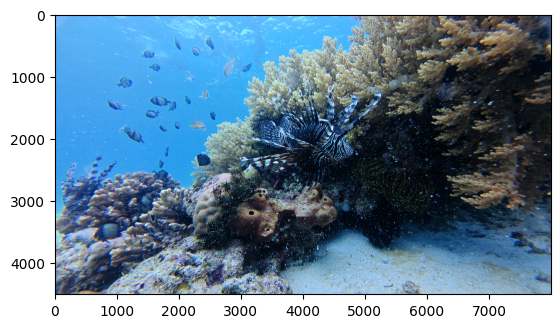

In [31]:
img = plt.imread('img00.jpeg')
plt.imshow(img)
plt.show()

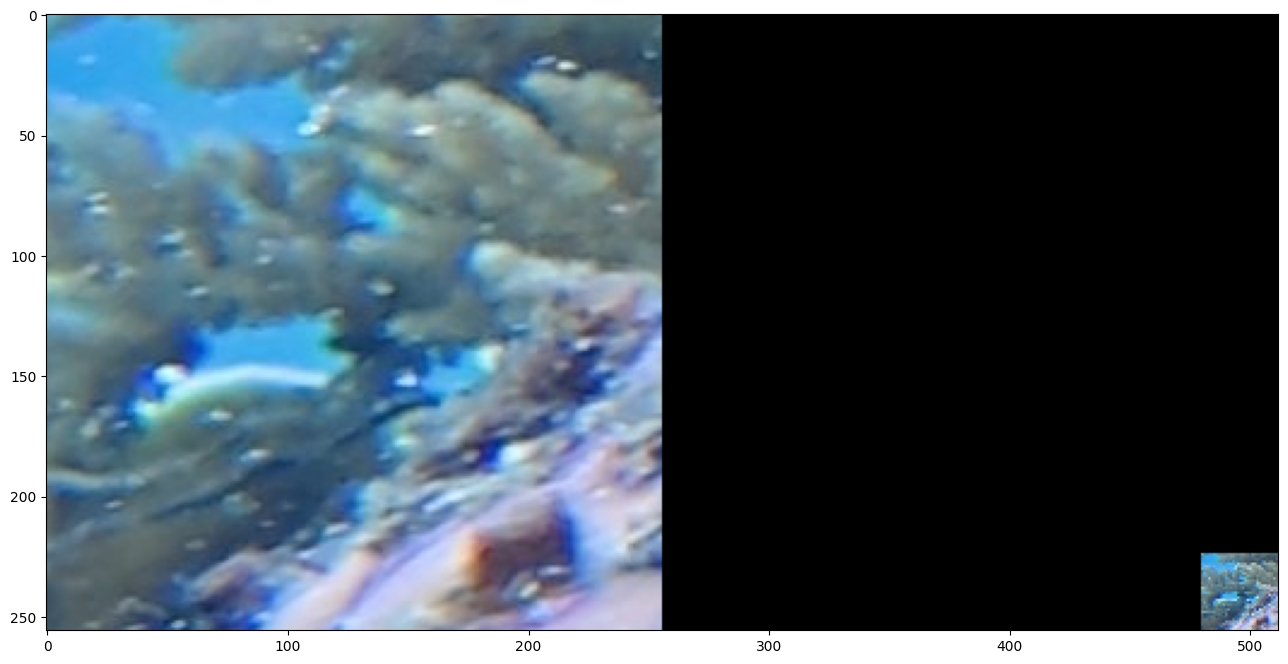

In [34]:
x0=2500
y0=2300

img_crop = img[x0:x0+256,y0:y0+256]
img_crop_down = img_crop[::8,::8]

tmp = np.zeros_like(img_crop)
tmp[-32:,-32:,:]=img_crop_down

plt.figure(figsize=(16,8))
plt.imshow(np.concatenate((img_crop,tmp),axis=1))
plt.show()

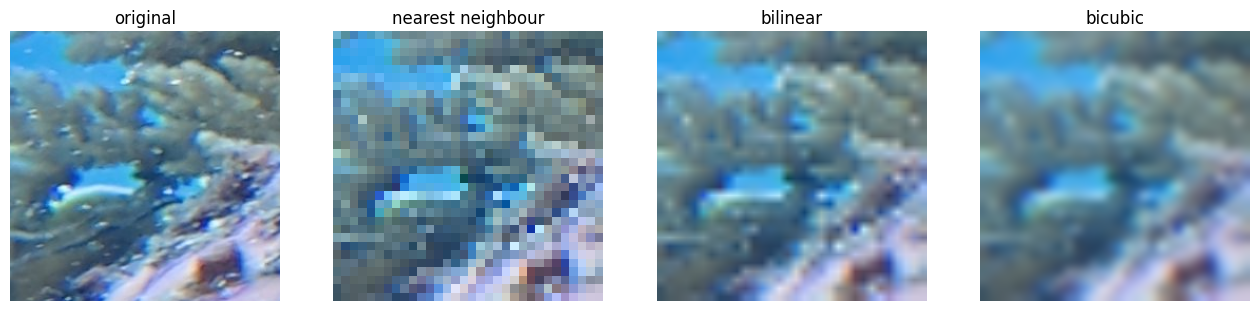

In [35]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(img_crop)
plt.title('original')
plt.axis('off')
plt.subplot(142)
plt.imshow(img_crop_down,interpolation='nearest')
plt.axis('off')
plt.title('nearest neighbour')
plt.subplot(143)
plt.imshow(img_crop_down,interpolation='bilinear')
plt.axis('off')
plt.title('bilinear')
plt.subplot(144)
plt.imshow(img_crop_down,interpolation='bicubic')
plt.axis('off')
plt.title('bicubic')
plt.show()


- 본인의 사진으로 위의 과정을 진행하여 결과를 첨부하자.